# Random Forest

###### # -*- coding: utf-8 -*-
###### # @Time : 2022/4/21
###### # @EMAIL： duanyu@bjtu.edu.cn
###### # @Software: PyCharm

###### 编程实现随机森林算法对sklearn库中的乳腺癌数据集进行分类，需列表或画图比较随机森林算法与决策树分类模型的性能表现，并使？？折交叉验证，探索随机森林分类模型的参数n_estimators（？树个数）的最优取值。

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

data = load_breast_cancer()
X = data['data']
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
n_estimators_list=[]
score_list=[]
for estimator in range(1,60):
    session = RandomForestClassifier(n_estimators=estimator, random_state=0)
    session = session.fit(X_train,y_train)
    score_list.append(cross_val_score(session,X,y,cv=10).mean())
    n_estimators_list.append(estimator)
    print('When n_estimators={}, score={}'.format(n_estimators_list[-1],score_list[-1]))


When n_estimators=1, score=0.9102756892230577
When n_estimators=2, score=0.9102130325814535
When n_estimators=3, score=0.9385025062656641
When n_estimators=4, score=0.9349937343358394
When n_estimators=5, score=0.9490601503759397
When n_estimators=6, score=0.9437969924812031
When n_estimators=7, score=0.9490601503759397
When n_estimators=8, score=0.9420426065162906
When n_estimators=9, score=0.9473057644110275
When n_estimators=10, score=0.9473057644110275
When n_estimators=11, score=0.9525689223057643
When n_estimators=12, score=0.9490601503759398
When n_estimators=13, score=0.9560776942355889
When n_estimators=14, score=0.9560776942355889
When n_estimators=15, score=0.9543233082706765
When n_estimators=16, score=0.9543546365914788
When n_estimators=17, score=0.9578947368421054
When n_estimators=18, score=0.956140350877193
When n_estimators=19, score=0.9578947368421054
When n_estimators=20, score=0.9596491228070176
When n_estimators=21, score=0.9596491228070176
When n_estimators=22, s

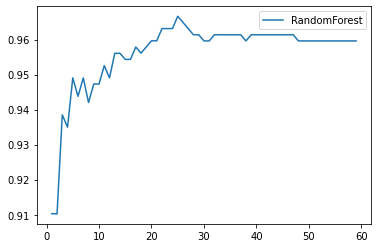

In [7]:
n_estimators_list=np.array(n_estimators_list)
score_list=np.array(score_list)
plt.plot(n_estimators_list,score_list,label = "RandomForest")
plt.legend()
plt.show()

##### 已知随机森林评估员数最优值为25

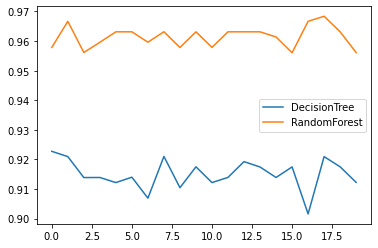

In [8]:
from sklearn.tree import DecisionTreeClassifier
s1l=[]
s2l=[]
for i in range(20):
    session1 = DecisionTreeClassifier()
    session1 = session1.fit(X_train,y_train)
    s1l.append(cross_val_score(session1,X,y,cv=10).mean())
    session2 = RandomForestClassifier(n_estimators=25)
    s2l.append(cross_val_score(session2,X,y,cv=10).mean())
plt.plot(range(20),s1l,label = "DecisionTree")
plt.plot(range(20),s2l,label = "RandomForest")
plt.legend()
plt.show()